# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project, movie data is selected for investigation. The dataset includes movies data back from 50s till 2015. As a movie fan and complete outsider of movie industry, my goal with this investidation is to find out facts about movie industry history and gain insights about movie industry. Question I want to answer will be:
<ul>
<li> To find out top ranking movies and directors in terms of different evaluation standard; </li>
<li> If movies with high voted score make more money; </li>
<li> How do movies of differen genres perform in terms of market success and audience voting; </li>
</ul>

In [2]:

# Use this cell to set up import statements for all of the packages that you
#   plan to use.
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [84]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("movies.csv")
#df.info()
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [85]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#remove non-interesting columns
del df['tagline']
del df['overview']
del df['revenue']
del df['budget']
del df['vote_count']
del df['runtime']
del df['keywords']
del df['imdb_id']
del df['id']
del df['homepage']
#rename budget_adj, revenue_adj to simply budget and revenue
df.rename(columns={'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace=True)
df.head(1)


,popularity,original_title,cast,director,genres,production_companies,release_date,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09


In [86]:
# remove empty/ missing info lines

#df.dropna(inplace = True)
df.to_csv('movie_reduced.csv')


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 Is there high/low season for movie release?

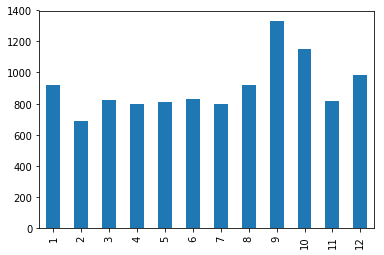

In [87]:
#convert time to date format
df = pd.read_csv('movie_reduced.csv', encoding = "ISO-8859-1")
df['release_date'] = pd.to_datetime(df['release_date'])
df['rel_month'] = df['release_date'].dt.month
month_ind = sorted(df['rel_month'].value_counts().index)

#plot the monthly distribution of movie release
df['rel_month'].value_counts()[month_ind].plot(kind='bar')                  

> The above graph shows that there are more movies released during the second half of the year, where release peaks in September, and lowest month is in Feburary.

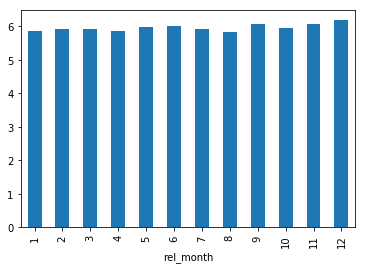

In [88]:
#If movie performance differs among release month?
#plot the average voted score among release month
df.groupby('rel_month')['vote_average'].mean()[month_ind].plot(kind='bar')  

<a id='eda'></a>
### Research Question 2 Explore several Top 10s in movie industry  

> following cells are used to show top 10 movies in terms of popularity and vote average; Top 10 directors in terms of directing movies with highest voted score and directing the highest amount of movies 

In [89]:
# top10 movie in terms of popularity
df.nlargest(10, 'popularity')

,Unnamed: 0,popularity,original_title,cast,director,genres,production_companies,release_date,vote_average,release_year,budget,revenue,rel_month
0,0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,6
1,1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,5
629,629,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,8.0,2014,1.519800e+08,5.726906e+08,11
630,630,14.311205,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,7.9,2014,1.565855e+08,7.122911e+08,7
2,2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,3
631,631,12.971027,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,Action|Adventure|Science Fiction,Marvel Studios,2014-03-20,7.6,2014,1.565855e+08,6.583651e+08,3
1329,1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,7.9,1977,3.957559e+07,2.789712e+09,3
632,632,11.422751,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,7.0,2014,1.842182e+07,7.252661e+07,10
3,3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,12
633,633,10.739009,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,2014-11-18,6.6,2014,1.151364e+08,6.927528e+08,11


In [90]:
# top10 movies in terms of average vote
df.nlargest(10, 'vote_average')

,Unnamed: 0,popularity,original_title,cast,director,genres,production_companies,release_date,vote_average,release_year,budget,revenue,rel_month
3894,3894,0.006925,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,Documentary,NaN,2011-09-03,9.2,2011,0.0,0.0,9
538,538,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,Documentary,NaN,2015-01-01,8.9,2015,0.0,0.0,1
1200,1200,0.129531,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,2014-12-16,8.8,2014,0.0,0.0,12
2269,2269,0.222293,Life Cycles,NaN,Derek Frankowski,Documentary,NaN,2010-10-02,8.8,2010,0.0,0.0,10
6911,6911,0.212010,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,Music,SMV Enterprises|Columbia Music Video|EMI,2006-07-09,8.7,2006,0.0,0.0,7
2401,2401,0.067753,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã kerfeldt|Martin ""Axe"" Axenrot|Martin ...",NaN,Music,NaN,2010-09-21,8.6,2010,0.0,0.0,9
3224,3224,0.224721,John Mayer: Where the Light Is Live in Los Ang...,John Mayer|Steve Jordan|Pino Palladino|David R...,NaN,Music,NaN,2008-07-01,8.5,2008,0.0,0.0,7
3690,3690,0.321341,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,Adventure|Documentary,Red Bull Media House|Brain Farm Digital Cinema,2011-09-08,8.5,2011,0.0,0.0,9
5830,5830,0.248944,Doctor Who: The Time of the Doctor,Matt Smith|Jenna Coleman,James Payne,NaN,NaN,2013-12-25,8.5,2013,0.0,0.0,12
8221,8221,0.194889,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,Martin Scorsese|Michael Henry Wilson,Documentary,Miramax Films|British Film Institute (BFI),1995-05-21,8.5,1995,0.0,0.0,5


In [91]:
#top 10 directors in terms of average vote
df['director'].nunique()
df.groupby('director')['vote_average'].mean().nlargest(10)

director
Mark Cousins                                   9.2
Derek Frankowski                               8.8
David Mallet                                   8.7
Curt Morgan                                    8.5
James Payne                                    8.5
Martin Scorsese|Michael Henry Wilson           8.5
Saul Swimmer                                   8.5
Anthony Mandler                                8.4
D.A. Pennebaker|David Dawkins|Chris Hegedus    8.4
Jorge RamÃ­rez SuÃ¡rez                         8.4
Name: vote_average, dtype: float64

In [92]:
#top 10 directors in terms of number of movies directed
df['director'].value_counts().nlargest(10)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Name: director, dtype: int64

<a id='eda'></a>

### Research Question 3 Movie Industry Insight ----Are more movies being produced over the years?  Are movie industry more profitable over the years?

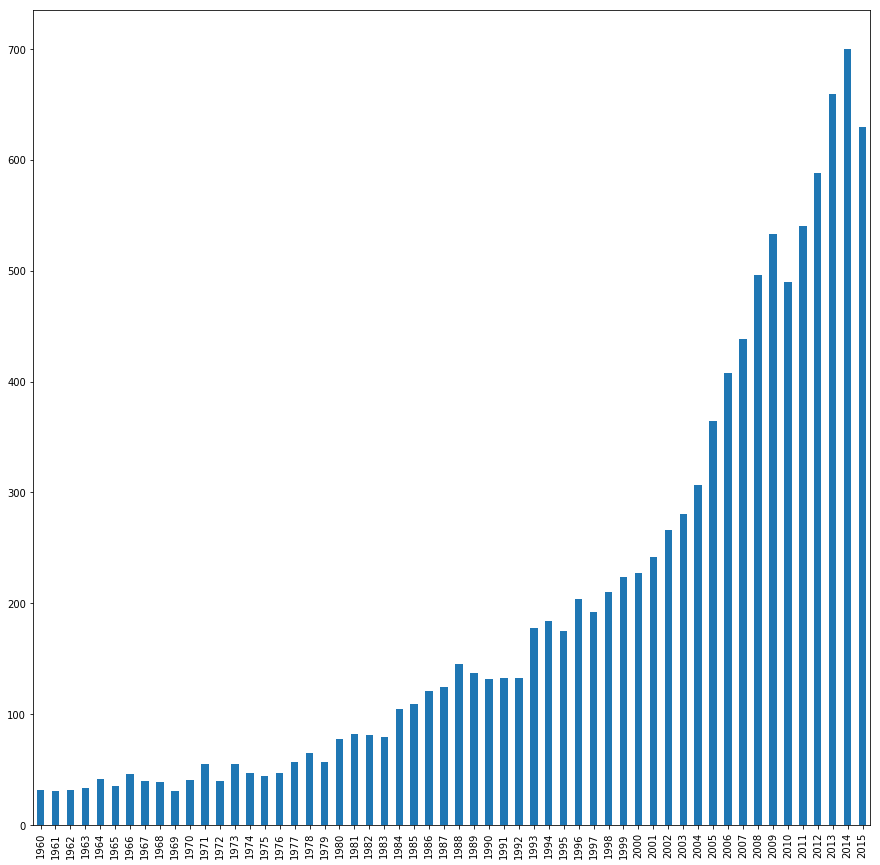

In [93]:
# more movies being produced over the years?
ind = df['release_year'].value_counts().index
df['release_year'].value_counts()[sorted(ind)].plot(kind='bar', figsize=(15,15))

>Bar chart above shows generily speaking, more movies are being produced over years

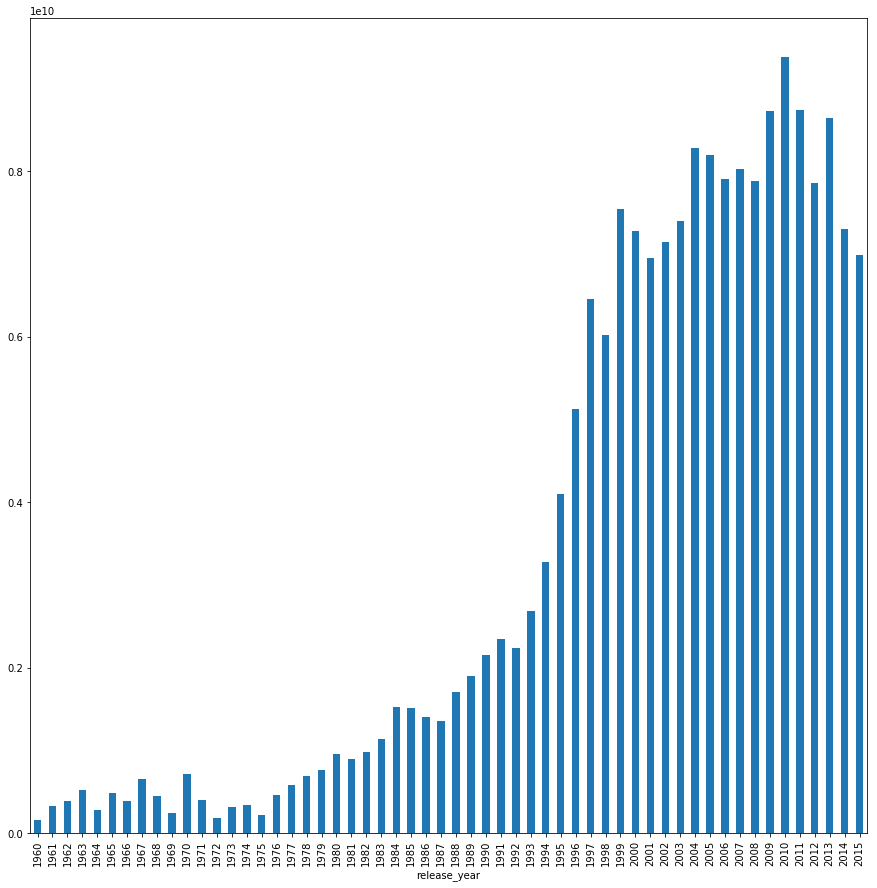

In [94]:
#annual investment in movie indsutry
ind = df['release_year'].value_counts().index
df.groupby('release_year')['budget'].sum().plot(kind='bar', figsize=(15,15))

>and not suprisingly, more money are invested into movie industry over the years

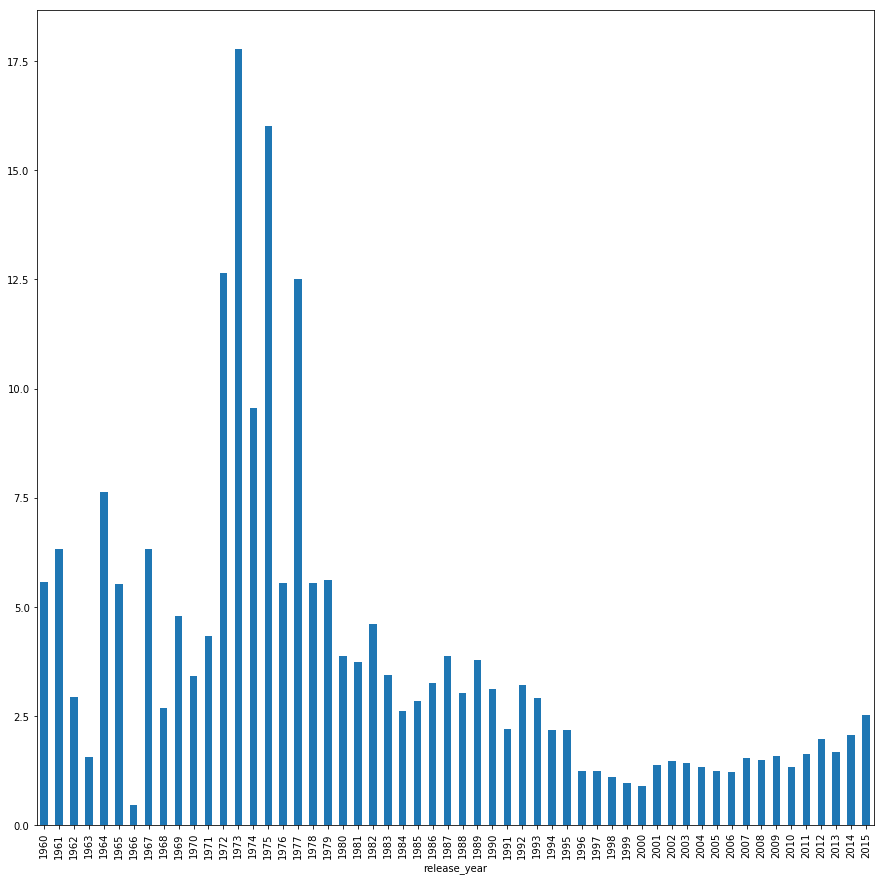

In [95]:
#annual RoI trend for movie industry roi = (revenue-budget)/budget
ind = df['release_year'].value_counts().index
annual_roi = (df.groupby('release_year')['revenue'].sum()-df.groupby('release_year')['budget'].sum())/df.groupby('release_year')['budget'].sum()
annual_roi.plot(kind='bar', figsize=(15,15))

>By looking into the RoI over the years how ever, it seems the golden time for Movie industries was back in the 70s when average annual RoI reached about 18%. Same value in 2015 is only a little more than 2.5%. Another possibility is there are long runner/super performer movies that gets higher cumulative RoI comparing to new movies.  

<a id='eda'></a>
### Research Question 3 Is a "good" movie always a market success?

In [138]:
# calculate roi(return on Investment) for each movie. roi = (revenue-budget)/budget
#only do further cleaning focuing on revenue and budget so that data is not lost for previous analysis
df['revenue'].replace(0, np.nan, inplace = True)
df['budget'].replace(0, np.nan, inplace = True)
df.replace([np.inf, -np.inf], np.nan, inplace = True)
df.dropna(inplace = True)

roi = (df.revenue-df.budget)/df.budget
#calculate the lorithm of roi for each movie
roi_log = np.log10((df.revenue-df.budget)/df.budget)
#add new column roi into dataframe
df['roi'] = roi
df['roi_log'] = roi_log
#remove inifinte RoI and NaN if any
df.replace([np.inf, -np.inf], np.nan, inplace = True)
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df.to_csv('movie_roi.csv')
df.info()
#remove outliers

#df.to_csv('movie_reduced.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 16 columns):
Unnamed: 0              2750 non-null int64
Unnamed: 0.1            2750 non-null int64
popularity              2750 non-null float64
original_title          2750 non-null object
cast                    2750 non-null object
director                2750 non-null object
genres                  2750 non-null object
production_companies    2750 non-null object
release_date            2750 non-null object
vote_average            2750 non-null float64
release_year            2750 non-null int64
budget                  2750 non-null float64
revenue                 2750 non-null float64
rel_month               2750 non-null int64
roi                     2750 non-null float64
roi_log                 2750 non-null float64
dtypes: float64(6), int64(4), object(6)
memory usage: 343.8+ KB


>After further cleaning, only 2750 out of 10086 entries remains for further investigation. Entries being removed main have missing data or have non-sense info ---- or there maybe movies with super earnings being removed as well --- those data, even real, need to be removed, because their single presence may alter the global image.
Therefore following investigation is performed on typical "normal" movie datas.

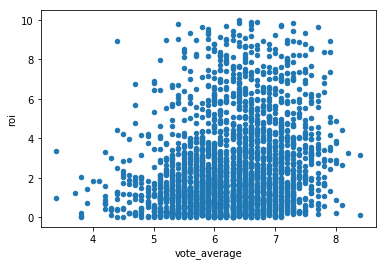

In [145]:
#plot scatter graph to show if there is correlation between vote and roi
df = pd.read_csv('movie_roi.csv', encoding = "ISO-8859-1")
df = df_roi[df_roi['roi_log'] < 1]
df.reset_index(drop=True, inplace=True)
df.plot.scatter(x='vote_average', y='roi')

>The above scatter plotted shows the correlation between RoI and average voted score. The Graph indicates that a "bad" movie is less likely to become profitable. However, once the movie reaches a "reasonable" voted score, the score itself is not a good indicator for movie profitability any more, in fact, a movie which has a "high" score tends to be less profitable than movies with average scores.

<a id='eda'></a>
### Research Question 4 Movie genre study, does certain genre related to a higher voted score or better RoI? 

In [146]:
#split the genre, if certain genre promises higher ROI or average vote than others?

#each movie may have more than one genre, therefore resulting in a list of array
genre_array_list = df['genres'].str.split('|')
#list container for seperate genre
genre_list = []
#list container for vote_average
vote_list = []
#list container for ROI
roi_list = []

#flatten the genre array list into a list with single genre per element. 
#roi and vote value needs to be repeated for each movie for number-of-genre times to align with the produced genre list
for x in range(0, len(genre_array_list)-1):
    genre_list = np.concatenate((genre_list,genre_array_list[x]),axis=0)
    vote_list = np.concatenate((vote_list,np.repeat(df['vote_average'][x], len(genre_array_list[x]))),axis=0)
    roi_list = np.concatenate((roi_list,np.repeat(df['roi'][x], len(genre_array_list[x]))),axis=0)  

# combine the genre_list, vote_list and roi_list into single dataframe    
df_genre = pd.DataFrame({'genre':genre_list,
                         'vote' :vote_list,
                         'roi'  :roi_list})

# save result dataframe into a csv
df_genre.to_csv('genre.csv', index=False)

df_genre.head(2)

,genre,roi,vote
0,Action,9.090192,6.5
1,Adventure,9.090192,6.5


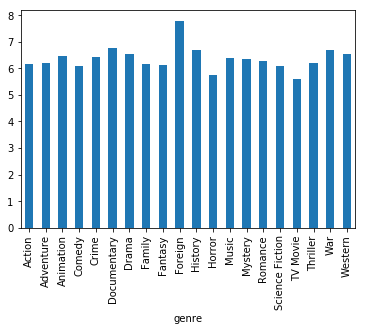

In [147]:
# plot average vote value for each genre
df_genre.groupby('genre')['vote'].mean().plot('bar')

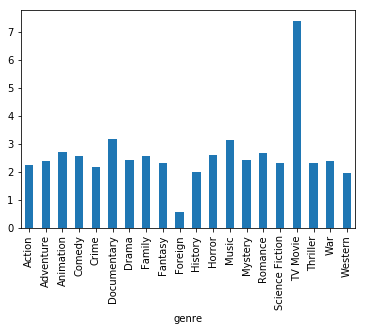

In [148]:
# plot average ROI value for each genre
df_genre.groupby('genre')['roi'].mean().plot('bar')

>The above grah explores the relation between RoI and movie genres. Genre "TV Movie" promises a best chance of success in terms of RoI, while "Foreign" are least profitable genre. (Possible reason is foreign is not acutally targeting US market???)



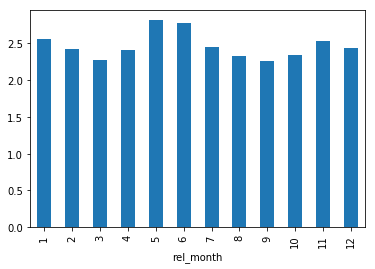

In [149]:
#plot the average RoI among release month
#df.groupby('rel_month')['roi'].mean()  
df.groupby('rel_month')['roi'].mean()[month_ind].plot(kind='bar')  

>Movie RoI shows seasonal change as well, movies released in March, January and October are more profitable than other movies.

<a id='conclusions'></a>
## Conclusions
> The movie data helped to reveal top movies in terms of different criteria, which is a good hint for movie choosings.

>The focus of the investigation is on the movie industry as a whole. The ultimate question I want to answer is, suppose I were a invester, I want to know if Movie industry is still a profitable industry worth entering. And should I entered the market, what factors shall I pay attention to when deciding which movie to invest.

>For the global question, it seems over the years, movie industry is still growing as more movies are produced and more money are brought in each year. However, producing movie is on average less profitable than 70s.

> For futher investigating factors that could influent movie's profitablitiy, I used RoI as the profitability indicator of a movie. during the project, RoI is checked against, genre, released_month and voted_score. Results show the most profitable movie genre is "TV Movie", the best release time is in may and "Voted score" is not always a deciding factor for movies'profitablity. these results could be used as a good investment guide reference.

> **Limitations**: 
<ul>
<li> The original data set may not contain all movies being produced during the time frame.</li>
<li> The datas included in the data set have many missing values and become invaid for data analysis.</li>
<li> When comparing movie produced in the past and in the modern time, the final result might be biased as "good old" movies have more time to accumulate voted score/profit.</li>
<li> When investgating movies profitablity, each factor is being investidated seperately, One can not simply extend the conclusion to say "a TV movie that release in May" have the best chance in the market. </li>
</ul>